In [1]:
import numpy as np
import pandas as pd
import plotnine as pn

In [2]:
h_males = pd.DataFrame({'height': np.random.normal(loc = 176, scale = 2.7, size = 10000)})
h_females = pd.DataFrame({'height': np.random.normal(loc = 166, scale = 2.5, size = 10000)})

heights = pd.concat([h_males, h_females], axis = 0)

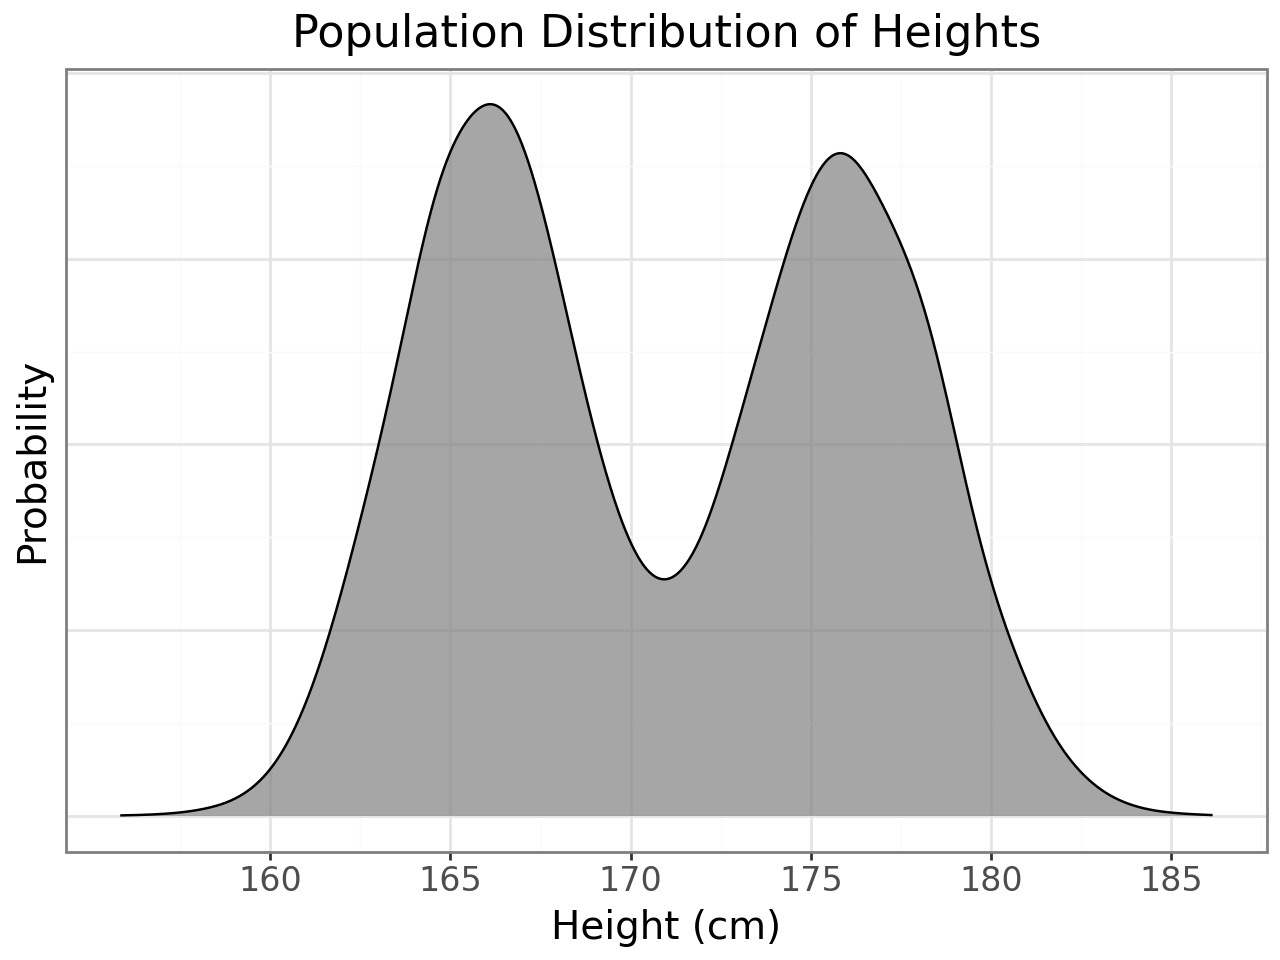

In [3]:
(pn.ggplot(heights, pn.aes(x = 'height')) +
  pn.geom_density(fill = 'grey', alpha = .7) +
  pn.scale_x_continuous(breaks = [160, 165, 170, 175, 180, 185]) +
  pn.labs(x = 'Height (cm)', y = 'Probability', title = 'Population Distribution of Heights') +
  pn.theme_bw() + 
  pn.theme(axis_text_y = pn.element_blank(),
        axis_ticks_y = pn.element_blank(),
        axis_text_x = pn.element_text(size = 12),
        axis_title_y = pn.element_text(size = 14, margin = {'r': 4}),
        axis_title_x = pn.element_text(size = 14, margin = {'t': 18}),
        title = pn.element_text(size = 16))
)

In [18]:
# Create dataframe to store outputs in
outcomes = pd.DataFrame(columns = ["mean_c"])

# Iterate sampling procedure (take 10,000 samples)
for i in range(10000):
    np.random.seed(i)

    sample = heights.sample(n = 30)

    sample_mean = pd.DataFrame({"mean_c": [np.mean(sample)]})

    outcomes = pd.concat([outcomes, sample_mean], ignore_index = True)

<positron-console-cell-18>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


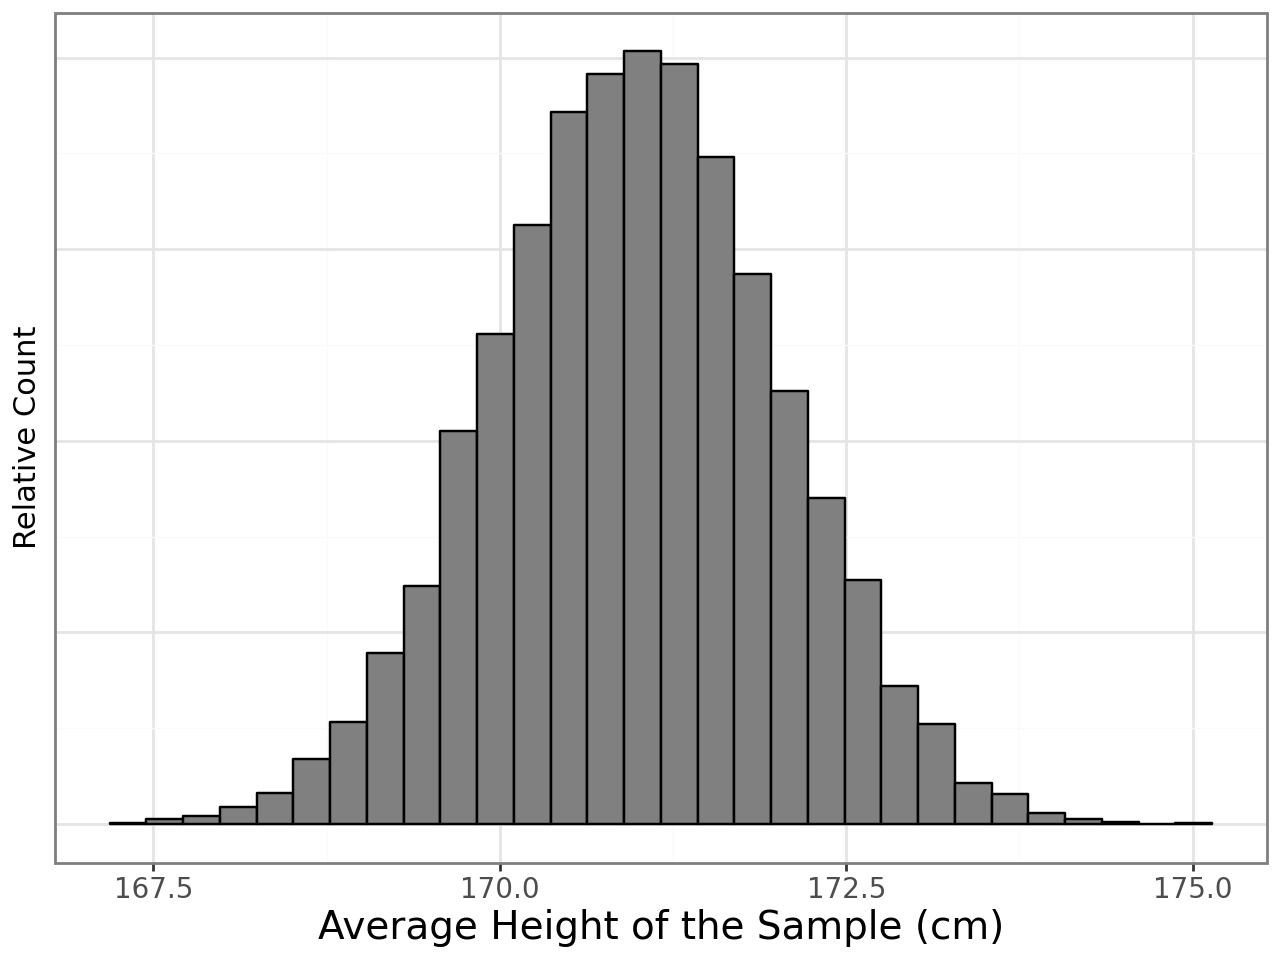

In [19]:
(
pn.ggplot(outcomes, pn.aes(x = 'mean_c')) +
  pn.geom_histogram(bins = 30, fill = 'grey', color = 'black') +
  pn.labs(x = 'Average Height of the Sample (cm)', y = 'Relative Count') +
  pn.theme_bw() +
  pn.theme(axis_text_x = pn.element_text(size = 10),
        axis_text_y = pn.element_blank(),
        axis_ticks_y = pn.element_blank(),
        axis_title_x = pn.element_text(size = 14, margin = {'t': 14}))
)

In [20]:
np.random.seed(11)

h_males = pd.DataFrame({'x1': np.random.normal(loc = 177, scale = 2.7, size = 500)})
h_females = pd.DataFrame({'x1': np.random.normal(loc = 164, scale = 2, size = 500)})

sims = pd.concat([h_males, h_females], axis = 0)

<positron-console-cell-23>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


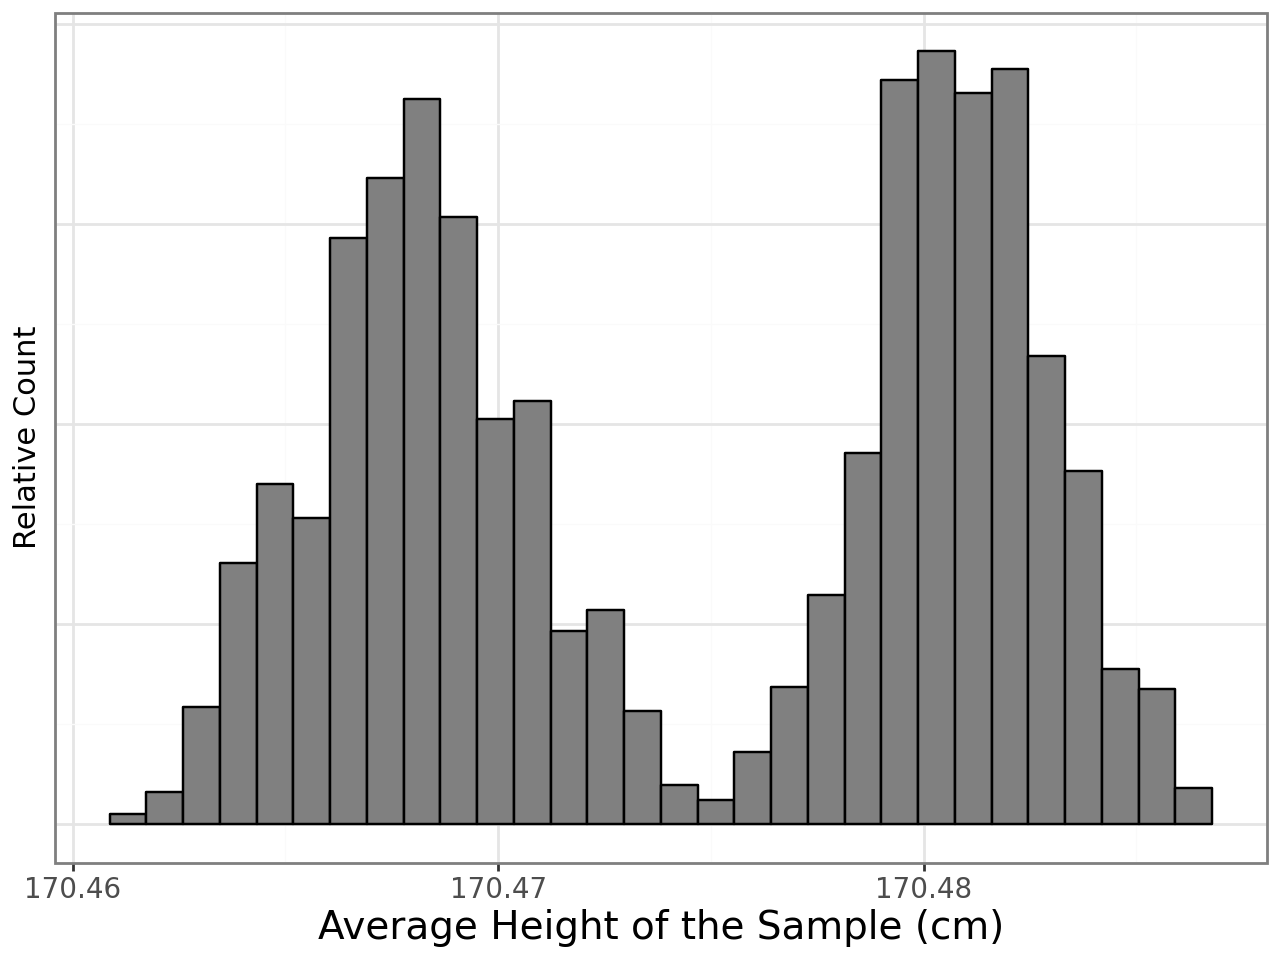

In [23]:
# Reset dataframe to store outputs in
outcomes = pd.DataFrame(columns = ["mean_c"])

# Iterate sampling procedure (take 10,000 samples)
for i in range(10000):
    np.random.seed(i)
    sample = sims.sample(n = 999, replace = False)
    sample_mean = pd.DataFrame({"mean_c": [np.mean(sample)]})
    outcomes = pd.concat([outcomes, sample_mean], ignore_index = True)

# Plot the sample means
(pn.ggplot(outcomes, pn.aes(x = 'mean_c')) +
  pn.geom_histogram(bins = 30, fill = 'grey', color = 'black') +
  pn.labs(x = 'Average Height of the Sample (cm)', y = 'Relative Count') +
  pn.theme_bw() +
  pn.theme(axis_text_x = pn.element_text(size = 10),
        axis_text_y = pn.element_blank(),
        axis_ticks_y = pn.element_blank(),
        axis_title_x = pn.element_text(size = 14, margin = {'t': 14}))
)